In [6]:
!pip install tensorflow

^C


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Hàm xây dựng mô hình tối ưu
def build_model(vocab_size, num_classes, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(num_classes, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
# Hàm vẽ biểu đồ
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Biểu đồ Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Biểu đồ Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [34]:
# Tạo từ điển ánh xạ với nhóm từ khóa cho mỗi chủ đề
technically = {
    'website': ['website', 'web'],
    'mobile-app': ['mobile app', 'app di động', 'Xây dựng ứng dụng', 'Xây dựng Ứng dụng', 'Ứng dụng di động', 'Phát triển ứng dụng', 'Xây dựng ứng dụng'],
    'game': ['game'],
    'chatbot': ['chatbot', 'chat bot'],
    'artificial-intelligence': ['trí tuệ nhân tạo'],
    'machine-learning': ['machine learning', 'máy học'],
    'deep-learning': ['deep learning', 'học sâu'],
    'computer-vision': ['computer vision', 'thị giác máy tính'],
    'big-data': ['big data', 'dữ liệu lớn', 'bigdata'],
    'data-analysis': ['data analysis', 'phân tích dữ liệu'],
    'cloud-computing': ['cloud computing', 'điện toán đám mây', 'K8s', 'kubernetes'],
    'blockchain': ['blockchain', 'chuỗi khối', 'NFT'],
    'robot': ['robot', 'robotics', 'robotic'],
    'drone': ['drone', 'flycam'],
    'vr': ['vr', 'thực tế ảo', 'virtual reality'],
}

In [35]:
# Hàm phân loại chủ đề
def categorize_project(project_name):
    matched_themes = []
    for theme, keywords in technically.items():
        if any(keyword.lower() in project_name.lower() for keyword in keywords):
            matched_themes.append(theme)
    return ', '.join(matched_themes) if matched_themes else 'other'

In [85]:
# Tải dữ liệu
pd_data = pd.read_csv('D:/Github/DanhgiaDuAnVaNghenghiepTuongLai/dataset/dataset_train_ver1.csv')
df = pd_data[['nameProject_VNI']].copy()
df['category'] = df['nameProject_VNI'].apply(categorize_project)
pd_data

,STT,nameProject_VNI,nameProject_ENG,difficulty_level,codeSememter,major,specialization,Note
0,1,Xây dựng hệ thống quản lý sân cầu lông,NaN,1.0,232.0,NaN,NaN,UIT
1,2,Tìm hiểu công nghệ Web 3.0 và ứng dụng web 3.0...,NaN,1.0,232.0,NaN,NaN,UIT
2,3,Xây dựng hệ thống trợ giúp tư vấn hướng nghiệp...,NaN,1.0,232.0,NaN,NaN,UIT
3,4,Xây dựng mạng xã hội kết hợp chatbot cho người...,NaN,1.0,232.0,NaN,NaN,UIT
4,5,Tìm hiểu Chatbot và xây dựng ứng dụng hỗ trợ t...,NaN,1.0,232.0,NaN,NaN,UIT
...,...,...,...,...,...,...,...,...
576,577,Hướng tiếp cận để cải thiện tính mở rộng của H...,NaN,3.0,231.0,Công nghệ thông tin,NaN,HCMUS
577,578,Giải pháp tăng cường cho tương tác di động,NaN,3.0,231.0,Công nghệ thông tin,NaN,HCMUS
578,579,Nghiên cứu và áp dụng các phương pháp điều khi...,NaN,3.0,231.0,Công nghệ thông tin,NaN,HCMUS
579,580,Nghiên cứu các thuật toán khai thác đồ thị áp ...,NaN,3.0,231.0,Công nghệ thông tin,NaN,HCMUS


<Axes: xlabel='count', ylabel='Note'>

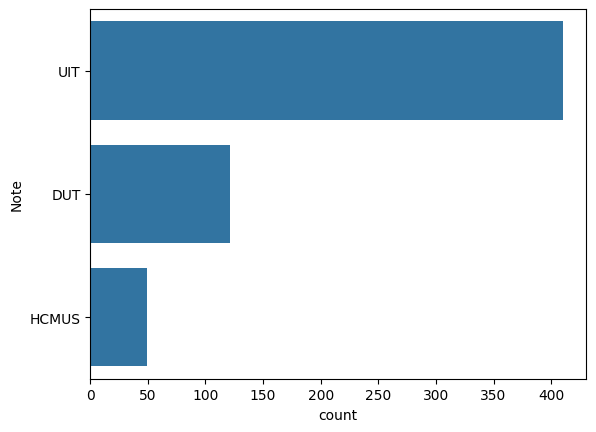

In [90]:
# UIT: Đại học Công nghệ thông tin HCM
# DUT: Đại học Đại học Bách Khoa - Đại học Đà Nẵng
# HCMUS: Đại học Khoa học Tự nhiên - Đại học Quốc gia TP.HCM
import seaborn as sns
sns.countplot(pd_data['Note'])

In [91]:
# Số lượng đồ án của từng trường ĐH
pd_data['Note'].value_counts()

Note
UIT      410
DUT      121
HCMUS     49
Name: count, dtype: int64

In [37]:
# Tạo các cột chỉ báo cho mỗi chủ đề
category_dummies = pd.get_dummies(df['category'].apply(lambda x: x.split(', ')).explode()).groupby(level=0).sum()
df = pd.concat([df, category_dummies], axis=1)

In [74]:
df

,nameProject_VNI,category,artificial-intelligence,big-data,blockchain,chatbot,cloud-computing,computer-vision,data-analysis,deep-learning,drone,game,machine-learning,mobile-app,other,robot,website
0,Xây dựng hệ thống quản lý sân cầu lông,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Tìm hiểu công nghệ Web 3.0 và ứng dụng web 3.0...,website,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Xây dựng hệ thống trợ giúp tư vấn hướng nghiệp...,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Xây dựng mạng xã hội kết hợp chatbot cho người...,chatbot,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Tìm hiểu Chatbot và xây dựng ứng dụng hỗ trợ t...,"mobile-app, chatbot",0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Hướng tiếp cận để cải thiện tính mở rộng của H...,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
577,Giải pháp tăng cường cho tương tác di động,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
578,Nghiên cứu và áp dụng các phương pháp điều khi...,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
579,Nghiên cứu các thuật toán khai thác đồ thị áp ...,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
# Lấy văn bản dự án và các nhãn
texts = df['nameProject_VNI'].values
categories = df.columns.difference(['nameProject_VNI', 'category'])
labels = df[categories].values

NameError: name 'df' is not defined

In [39]:
# Chuẩn bị tokenizer và padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_length)

In [40]:
# Chia dữ liệu thành huấn luyện và thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [3]:
# Khởi tạo mô hình
model = build_model(10000, len(categories), max_length)

NameError: name 'categories' is not defined

In [42]:
# Early stopping và checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [43]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.1878 - loss: 0.5638 - val_accuracy: 0.4359 - val_loss: 0.2118
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3298 - loss: 0.2206 - val_accuracy: 0.4359 - val_loss: 0.1694
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2960 - loss: 0.1990 - val_accuracy: 0.4359 - val_loss: 0.1662
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3755 - loss: 0.1861 - val_accuracy: 0.4359 - val_loss: 0.1643
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3295 - loss: 0.1900 - val_accuracy: 0.4359 - val_loss: 0.1658
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3036 - loss: 0.1942 - val_accuracy: 0.4359 - val_loss: 0.1642
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3215 - loss: 0.1918 - val_accuracy: 0.4359 - val_loss: 0.1639
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2985 - loss: 0.1965 - val_accuracy: 0.

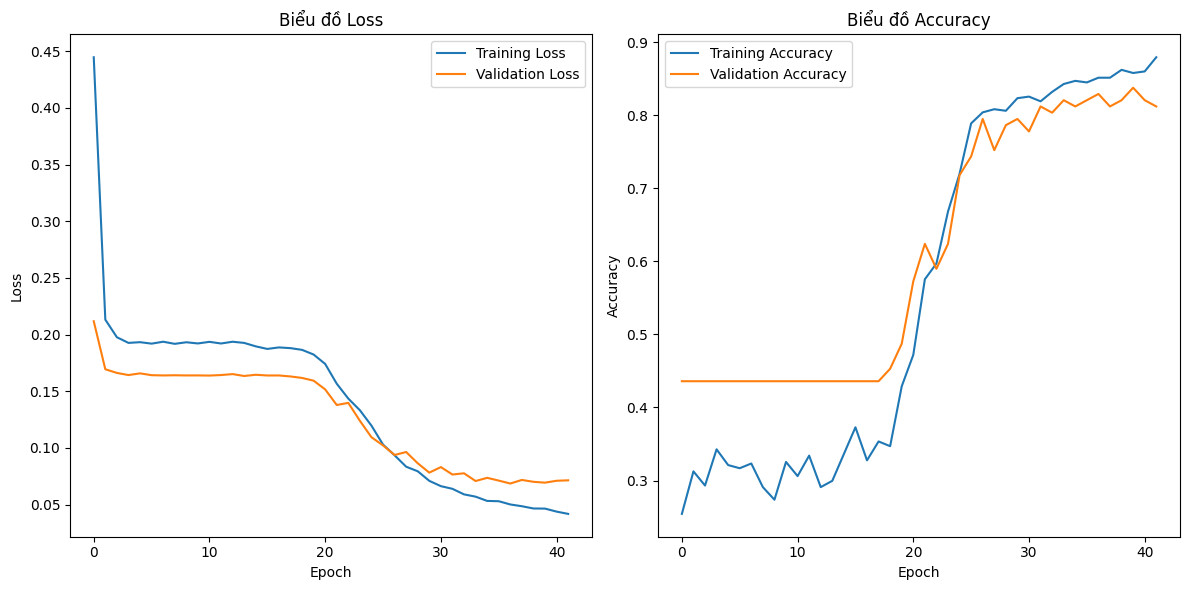

In [44]:
# Vẽ biểu đồ loss và accuracy
plot_history(history)

In [1]:
# Tải lại mô hình tốt nhất
model.load_weights('D:/Github/DanhgiaDuAnVaNghenghiepTuongLai/code_ai/best_model.keras')

# Dự đoán trên một dự án ngẫu nhiên
# random_project = "Xây dựng hệ thống chatbot tự động tư vấn tuyển sinh"
# tokenized_project = tokenizer.texts_to_sequences([random_project])
# padded_project = pad_sequences(tokenized_project, maxlen=max_length)

# prediction = model.predict(padded_project)
# predicted_labels = (prediction > 0.5).astype(int)
# predicted_categories = [categories[i] for i, value in enumerate(predicted_labels[0]) if value == 1]

# print("Dự án:", random_project)
# print("Nhãn dự đoán:", predicted_categories)

NameError: name 'model' is not defined

In [ ]:
# Computer Science - AI
# Xây dựng hệ thống chatbot tự động tư vấn tuyển sinh
# Dự đoán doanh thu bán hàng dựa trên phân tích dữ liệu
# Phân loại cảm xúc trong văn bản tiếng Việt
# Nhận dạng giọng nói và chuyển đổi thành văn bản tiếng Việt
# Hệ thống phát hiện gian lận giao dịch ngân hàng
# Ứng dụng AI trong phân tích y học
# Xây dựng hệ thống đề xuất sản phẩm dựa trên sở thích khách hàng
# Phân loại ảnh và nhận diện đối tượng trong môi trường thực tế
# Hệ thống quản lý học tập thông minh
# Tối ưu hóa lộ trình vận chuyển hàng hóa

# Dùng website để mua đồ chơi cho trẻ
# Dùng website để quản trị nhà máy điện
# Xây dựng ứng dụng để quản lý thiết bị thông minh

In [89]:
import numpy as np

# Bước 1: Chọn một dự án ngẫu nhiên
# random_project = df['nameProject_VNI'].sample(1).iloc[0]
random_project = "Xây dựng ứng dụng để quản lý thiết bị thông minh"

print("Dự án được chọn để dự đoán:", random_project)

# Bước 2: Chuẩn bị dữ liệu để dự đoán
# Tokenize và Pad văn bản của dự án được chọn
tokenized_project = tokenizer.texts_to_sequences([random_project])
padded_project = pad_sequences(tokenized_project, maxlen=max_length)

# Bước 3: Dự đoán
prediction = model.predict(padded_project)
predicted_labels = (prediction > 0.5).astype(int)

# Lấy các nhãn dự đoán
predicted_categories = [categories[i] for i, value in enumerate(predicted_labels[0]) if value == 1]
print("Nhãn dự đoán:", predicted_categories)

Dự án được chọn để dự đoán: Xây dựng ứng dụng để quản lý thiết bị thông minh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nhãn dự đoán: ['mobile-app']
